The `python_env.yml` is provided in the repository to create a reproducable environment. To install and active the environment, please run

`conda env create -n python_env -f python_env.yml`

`conda activate python_env`

in the terminal.

Feel free to add new packages to the environment if you use something that's not in the yaml file. If you prefer to use other tools to create a reproducable coding environment (e.g., docker, pip freeze), please give us instructions on how we can run your code. 

**Problem 1**

This is a general coding problem to assess your programing skill and your general problem solving skills. 

Starting from the origin O, a particle moves randomly a distance of +/- 1 along an axis of an n-dimensional space. The probability of moving +1 or -1 along each axis is uniform. A step consists of moving along one of the axes. After a step is taken, the move is repeated from the new position, and so on. If the walk continues forever, what is the probability that the particle returns to the origin O if n = 1, 2, and 3? Please solve this problem numerically and walk us through your solution. Hint: the problem has an analytical solution. Please use the analytical solution to verify your numerical approach. 
https://en.wikipedia.org/wiki/Random_walk#Higher_dimensions


In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statistics

import warnings
warnings.filterwarnings('ignore')

# PROBLEM 1

In this problem I think the key is to treat it like a simulation and generate a series of directions for each n (1,2,3) and then make many tests with many repetitions, for instance, take 100k steps in an n=3 space, and keep track of the location in that spaces as [0,0,0] and add or subtract on in the randomly selected dimension for each step and do this 10k times, count how many times you pass over [0,0,0] in each simulation and use those to create an average across repetitions which reflects the probability. If you make sufficiently large samples and repetitions, it should converge on the global probability in an infinite space. In the same manner you go through with other dimensions where n=1 and n=2.

## N=1

In [164]:
l=[]# the list of the end point of each particular
zero_output=0 # represents number of returning to the origin point
for i in range(10_000): # number of sample
    
    origin=0
    tries=0 # tries represents steps
    while tries<100_000: 
        tries+=1
        coin=np.random.randint(0,2) # 0 for left and 1 for right (equal probability for each direction)

        if coin==0:
            origin-=1 # walk 1 step to left from the last position
        else:
            origin+=1 # walk 1 step to right from the last position
    
    l.append(origin)
    if origin==0:
        zero_output+=1

print (f'Particle returned to the Origin {zero_output} time(s)\nProbability of return to the Origin: {zero_output/len(l):.4f}')
# print (f'End position at each 100k trials: {l}')

Particle returned to the Origin 23 time(s)
Probability of return to the Origin: 0.0023


Probability of returning back to the Origin is calculated by dividing "the number of returning to the Origin" to "the number of sample". According to the simulation the result is 0.0023

####  Distribution Graph of the Returning Points

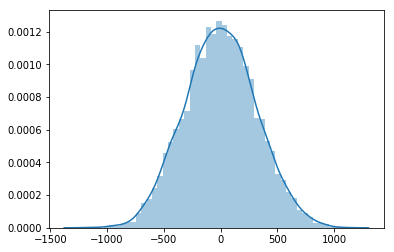

In [166]:
sns.distplot(l)

In [259]:
mean=statistics.mean(l)
std=statistics.stdev(l)
print(f'mean:{mean:.2f} and std:{std:.2f}')

mean:-1.18 and std:316.34


#### ppf of the returning back to the origin point

In [261]:
stats.norm.ppf(0,mean,std)

-inf

result of the ppf verifies the output of the simulation which is 0.0023

#### ppf of the returning back to the origin point

In [270]:
stats.norm.cdf(0,mean,std).round(3)

0.501

# N=2

In [177]:
l2=[] # the list of the end point of each particular
zero_output=0 # represents number of returning to the origin point
for i in range(10_000): # number of sample
    
    origin=[0,0]
    tries=0 # tries represents steps
    while tries<100_000:
        tries+=1
        coin=np.random.randint(0,4) # 0 for W, 1 for E, 2 for N and 3 for S (equal probability for each direction)

        if coin==0:
            origin[0]=origin[0]-1 # walk 1 step to the West from the last position
        elif coin==1:
            origin[0]=origin[0]+1 # walk 1 step to the East from the last position
        elif coin==2:
            origin[1]=origin[1]+1 # walk 1 step to the North from the last position
        elif coin==3:
            origin[1]=origin[1]-1 # walk 1 step to the South from the last position

    l2.append(origin)
    if origin==[0,0]:
        zero_output+=1

print (f'Particle returned to the Origin {zero_output} time(s)\nProbability of return to the Origin: {zero_output/len(l2):.4f}')
# print (f'End position at each 100k trials: {l2}')

Particle returned to the Origin 0 time(s)
Probability of return to the Origin: 0.0000


Probability of returning back to the Origin is calculated by dividing number of returning to the Origin to the number of sample. According to the simulation the result is 0.0000

####  Distribution Graph of the Returning Points

In [178]:
coordinate=pd.DataFrame(l2)
coordinate.rename(columns={0:'x',1:'y'}).head()

,x,y
0,-126,-8
1,273,-97
2,-130,-36
3,175,71
4,-271,-13


<function matplotlib.pyplot.show(*args, **kw)>

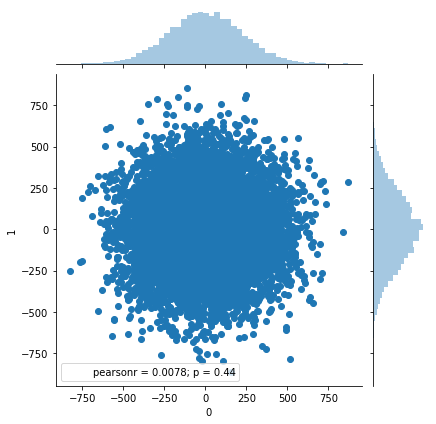

In [179]:
sns.jointplot(x=coordinate[0], y=coordinate[1], data=coordinate)
plt.show

In [ ]:
x_mean=statistics.mean(coordinate[0])
y_mean=statistics.mean(coordinate[1])

x_std=statistics.stdev(coordinate[0])
y_std=statistics.stdev(coordinate[1])

#### ppf of the returning back to the origin point

In [277]:
ppf_2=stats.norm.ppf([0,0],[x_mean,y_mean],[x_std,y_std])
print(f'ppf of x: {ppf_2[0]:.2f}\nppf of y: {ppf_2[1]:.2f}')
print(f'ppf of returning to the Origin: {ppf_2[0]*ppf_2[1]:.2f}')

ppf of x: -inf
ppf of y: -inf
ppf of returning to the Origin: inf


result of the ppf verifies the output of the simulation which is 0.0000

#### cdf of the returning back to the origin point

In [278]:
# cdf for x and y coordinates
cdf_2=stats.norm.cdf([0,0],[x_mean,y_mean],[x_std,y_std])
print(f'cdf of x: {cdf_2[0]:.2f}\ncdf of y: {cdf_2[1]:.2f}')
print(f'cdf of returning to the Origin: {cdf_2[0]*cdf_2[1]:.2f}') # found by multiplying cdf of the x and y coordinates

cdf of x: 0.49
cdf of y: 0.51
cdf of returning to the Origin: 0.25


# N=3

In [185]:
l3=[] # the list of the end point of each particular
zero_output=0 # represents the number of returning to the origin point
for i in range(10_000): # number of sample
    
    origin=[0,0,0] 
    tries=0 # tries represents steps
    while tries<100_000:
        tries+=1
        coin=np.random.randint(0,6) # 0 for W, 1 for E, 2 for N,3 for S, 4 for UP, 5 for DOWN (equal probability for each direction)
        
        if coin==0:
            origin[0]=origin[0]-1 # walk 1 step to the West from the last position
        elif coin==1:
            origin[0]=origin[0]+1 # walk 1 step to the East from the last position
        elif coin==2:
            origin[1]=origin[1]+1 # walk 1 step to the North from the last position
        elif coin==3:
            origin[1]=origin[1]-1 # walk 1 step to the South from the last position
        elif coin==4:
            origin[2]=origin[2]+1 # walk 1 step to UP from the last position
        elif coin==5:
            origin[2]=origin[2]-1 # walk 1 step to DOWN from the last position

    l3.append(origin)
    if origin==[0,0,0]:
        zero_output+=1

print (f'Particle returned to the Origin {zero_output} time(s)\nProbability of return to the Origin: {zero_output/len(l2):.4f}')
# print (f'End position at each 100k trials: {l2}')

Particle returned to the Origin 0 time(s)
Probability of return to the Origin: 0.0000


Probability of returning back to the Origin is calculated by dividing number of returning to the Origin to the number of sample. According to the simulation the result is 0.0000

####  Distribution Graph of the Returning Points

In [196]:
coordinate=pd.DataFrame(l3)
coordinate.rename(columns={0:'x',1:'y',2:'z'}).head()

,x,y,z
0,421,252,-81
1,64,244,-88
2,-165,246,-47
3,80,-20,-86
4,-421,194,-239


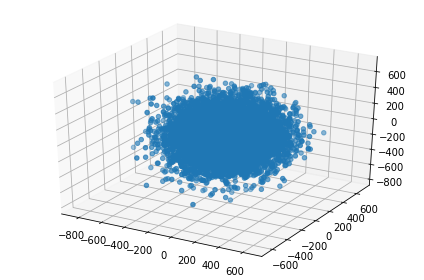

In [197]:
from mpl_toolkits.mplot3d import proj3d 

fig = plt.figure()
ax = fig.gca(projection='3d')

x = coordinate[0]
y = coordinate[1]
z = coordinate[2]

ax.scatter(x, y, z)
plt.tight_layout()  
plt.savefig('scatter.png')

In [ ]:
x_mean=statistics.mean(coordinate[0])
y_mean=statistics.mean(coordinate[1])
z_mean=statistics.mean(coordinate[2])

x_std=statistics.stdev(coordinate[0])
y_std=statistics.stdev(coordinate[1])
z_std=statistics.stdev(coordinate[2])

#### ppf of the returning back to the origin point

In [282]:
ppf_3=stats.norm.ppf([0,0,0],[x_mean,y_mean,z_mean],[x_std,y_std,z_std])
print(f'ppf of x: {ppf_3[0]:.2f}\nppf of y: {ppf_3[1]:.2f}\nppf of z: {ppf_3[2]:.2f}')
print(f'ppf of returning to the Origin: {ppf_3[0]*ppf_3[1]*ppf_3[2]:.2f}')

ppf of x: -inf
ppf of y: -inf
ppf of z: -inf
ppf of returning to the Origin: -inf


result of the ppf verifies the output of the simulation which is 0.0000

#### cdf of the returning back to the origin point

In [279]:
# cdf for x, y and z coordinates
cdf_3=stats.norm.cdf([0,0,0],[x_mean,y_mean,z_mean],[x_std,y_std,z_std])
print(f'cdf of x: {cdf_3[0]:.2f}\ncdf of y: {cdf_3[1]:.2f}\ncdf of z: {cdf_3[2]:.2f}')
print(f'cdf of returning to the Origin: {cdf_3[0]*cdf_3[1]*cdf_3[2]:.2f}') # found by multiplying cdf of the x, y and z coordinates

cdf of x: 0.49
cdf of y: 0.51
cdf of z: 0.50
cdf of returning to the Origin: 0.13


**Problem 2**

The University's Advancement mission is to engage with University's alumni, collect donations, organize events, etc.

`advancement.xlsx` in the data folder contains a variety of info on University's alumni. Each row represents one undergraduate alumni. The first column is their graduation year. Column names that start with CC and CR describe how many times an alumni served in what committees (CC) and in what role (CR) within a year. The number after the underscore is the year (17, 18, 19 standing for 2017, 2018, 2019, respectively). Column names that start with EV describe how many times an alumni attended certain event types per year. The last six columns describe how much the alumni donated per year. 'Cash' stands for money donated to the University while 'NGP' stands for pledges. Pledges will be paid over a certain period of time determined by the alumni but that information is not available in the dataset.

Please perform exploratory data analysis on this dataset. We'd like to see how you approach new problems, how you examine new datasets, and what insights you can uncover. Feel free to propose and if time allows work through a simple machine learning problem. Some relevant problems include but are not limited to:

- can we predict how much the alumni will donate one year ahead?
- can we identify major donors with donations above $50k? 
- how could Advancement measure alumni engagement?
- what events and committees drive donations?
- what events and committees don't drive donations?


# PROBLEM 2

In [279]:
df=pd.read_excel('./data/advancement.xlsx',index_col=False)
df.shape

(107318, 175)

In [1242]:
df.head()

,UG Class,CC_19 Total Committee Count,CC_19 Advisory Council/Board,CC_19 Affinity Group,CC_19 AIP,CC_19 Alumni Relations,CC_19 BAF,CC_19 BMAF,CC_19 BUSF,CC_19 Campaign,...,CR_17 Total Role Count,CR_17 Honorary/Ex-Officio,CR_17 Participant,CR_17 Leader,FY17 Cash,FY18 Cash,FY19 Cash,FY17 NGP,FY18 NGP,FY19 NGP
0,1983,7,0,0,0,0,3,0,0,1,...,5,0,3,2,350000,2003189,3758333,2350000,706522,31600000
1,1992,1,1,0,0,0,0,0,0,0,...,0,0,0,0,500000,360000,2860000,1200000,110000,25110000
2,1964,2,2,0,0,0,0,0,0,0,...,2,0,2,0,1107500,320100,350000,7500,20100,10050000
3,1989,8,2,0,3,0,3,0,0,0,...,4,0,4,0,25000,550000,2000000,25000,550000,10000000
4,2000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13000,33186,8250,750,2686,6000250


In [200]:
sns.distributions.stats.normaltest(coordinate[2])

NormaltestResult(statistic=0.8735176343811201, pvalue=0.6461272474045843)

In [22]:
df.isnull().sum().sum() # this proves that there is no null value in the dataframe

0

In [24]:
set(df.dtypes) # all value types are numeric. Either integer or float.

{dtype('int64'), dtype('float64')}

In [78]:
# I identified which colum is which type and how many are there
o_cols =df.select_dtypes(include=object)
f_cols =df.select_dtypes(include=float)
i_cols =df.select_dtypes(include=int)
print(f'# of integer columns: {len(i_cols.columns)}\n# of float columns: {len(f_cols.columns)}\nFloat Columns={list(f_cols.columns)}')
# print(f'Integer Columns={list(i_cols)}') # If you want to see which columns are integer please remove the # at the beginnong of the line

# of integer columns: 169
# of float columns: 6
Float Columns=['FY17\nCash', 'FY18\nCash', 'FY19\nCash', 'FY17\nNGP', 'FY18\nNGP', 'FY19\nNGP']


In [39]:
pd.DataFrame(df.dtypes).tail(7)

,0
CR_17\nLeader,int64
FY17\nCash,float64
FY18\nCash,float64
FY19\nCash,float64
FY17\nNGP,float64
FY18\nNGP,float64
FY19\nNGP,float64


# A. EXPLORE DATA

### Donation vs Pledge

In [411]:
donation_table=pd.DataFrame(df[['FY17\nCash','FY18\nCash','FY19\nCash']].sum())
pledge_table=pd.DataFrame(df[['FY17\nNGP','FY18\nNGP','FY19\nNGP']].sum())
pd.set_option('display.float_format', lambda x: '%.f' % x) 

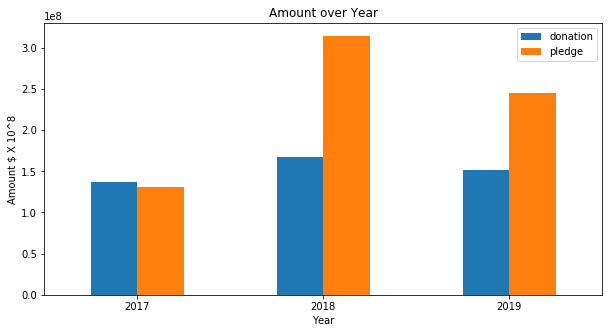

In [412]:
donation = [donation_table[0][0],donation_table[0][1],donation_table[0][2]]
pledge = [pledge_table[0][0],pledge_table[0][1],pledge_table[0][2]]
index = ['2017','2018','2019']
df_graph = pd.DataFrame({'donation': donation,
                    'pledge': pledge}, index=index)
ax = df_graph.plot.bar(rot=0,figsize=(10,5))
plt.title('Amount over Year')
plt.xlabel ('Year')
plt.ylabel ('Amount $ X 10^8')
plt.show()

### Average Amount per Donor

In [416]:
donation_table=pd.DataFrame(df[['FY17\nCash','FY18\nCash','FY19\nCash']].mean())
pledge_table=pd.DataFrame(df[['FY17\nNGP','FY18\nNGP','FY19\nNGP']].mean())
pd.set_option('display.float_format', lambda x: '%.f' % x) 

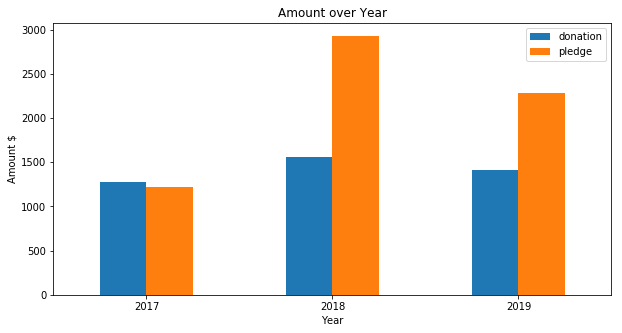

In [417]:
donation = [donation_table[0][0],donation_table[0][1],donation_table[0][2]]
pledge = [pledge_table[0][0],pledge_table[0][1],pledge_table[0][2]]
index = ['2017','2018','2019']
df_graph = pd.DataFrame({'donation': donation,
                    'pledge': pledge}, index=index)
ax = df_graph.plot.bar(rot=0,figsize=(10,5))
plt.title('Amount over Year')
plt.xlabel ('Year')
plt.ylabel ('Amount $')
plt.show()

### distribution of the Donation

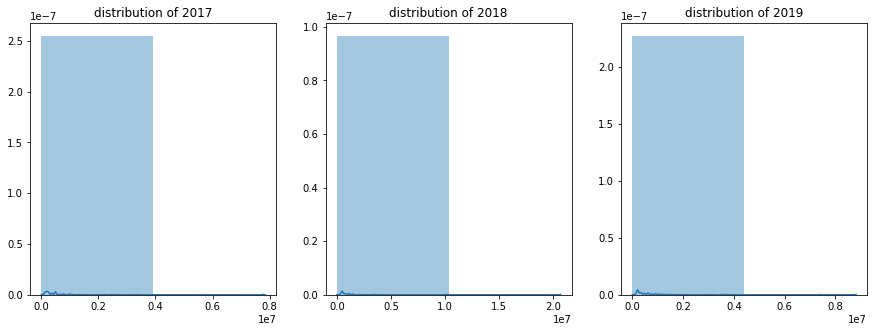

In [406]:
dist_donation_2017=pd.DataFrame(df['FY17\nCash'])
dist_donation_2018=pd.DataFrame(df['FY18\nCash'])
dist_donation_2019=pd.DataFrame(df['FY19\nCash'])

plt.subplots(1,3, figsize=(15,5))

plt.subplot(1,3,1, title='distribution of 2017')
sns.distplot(dist_donation_2017, bins=2, kde=True)

plt.subplot(1,3,2, title='distribution of 2018')
sns.distplot(dist_donation_2018, bins=2, kde=True)

plt.subplot(1,3,3, title='distribution of 2019')
sns.distplot(dist_donation_2019, bins=2, kde=True)


In [1647]:
df['FY19\nCash'].describe()

count    107318
mean       1410
std       54157
min           0
25%           0
50%           0
75%           0
max     8815342
Name: FY19\nCash, dtype: float64

 # B. SUB QUESTIONS

# B1. Can we predict how much the alumni will donate one year ahead?

In [1606]:
df.columns

Index(['UG\nClass', 'CC_19 Total\nCommittee Count',
       'CC_19\nAdvisory Council/Board', 'CC_19\nAffinity Group', 'CC_19\nAIP',
       'CC_19\nAlumni Relations', 'CC_19\nBAF', 'CC_19\nBMAF', 'CC_19\nBUSF',
       'CC_19\nCampaign',
       ...
       'CR_17 Total\nRole Count', 'CR_17\nHonorary/Ex-Officio',
       'CR_17\nParticipant', 'CR_17\nLeader', 'FY17\nCash', 'FY18\nCash',
       'FY19\nCash', 'FY17\nNGP', 'FY18\nNGP', 'FY19\nNGP'],
      dtype='object', length=175)

### Split Main dataset based on donated years
I split main datset in 2 different dataframes. df_2017 contains 2017-year data and donation amuont of 2018 (next year) df_2018 contains 2018-year data and donation amuont of 2019 (next year)

In [1737]:
# Seperate columns regarding year.
columns_2017=[]
columns_2018=[]
columns_2019=[]
for i in list(df.columns):
    if '17' in i:
        columns_2017.append(i)
    
for i in list(df.columns):
    if '18' in i:
        columns_2018.append(i)

for i in list(df.columns):
    if '19' in i:
        columns_2019.append(i)
columns_2017.append('UG\nClass')
columns_2017.append('FY18\nCash')
columns_2018.append('UG\nClass')
columns_2018.append('FY19\nCash')

In [1738]:
df_2017=df[columns_2017]
df_2018=df[columns_2018]

### Concat Two datasets in one dataset

In [1739]:
# in order to concat both dataframes I have to make same the colum names. 
# ty means this year, ny means next year
df_2017.columns = df_2017.columns.str.replace("(17)", "ty")
df_2017.columns = df_2017.columns.str.replace("(18)", "ny")
df_2018.columns = df_2018.columns.str.replace("(18)", "ty")
df_2018.columns = df_2018.columns.str.replace("(19)", "ny")

In [1740]:
# I adde year info to differentiate datasets if requires for analyzing soon.
df_2017['year']='2017'
df_2018['year']='2018'

In [1741]:
df_new=pd.concat([df_2017,df_2018])
df_new.shape

(214636, 61)

In [1742]:
# our dataframe is in good format to predict one year ahed.
df_new.head()

,CC_ty Total Committee Count,CC_ty Advisory Council/Board,CC_ty Affinity Group,CC_ty AIP,CC_ty Alumni Relations,CC_ty BAF,CC_ty BMAF,CC_ty BUSF,CC_ty Campaign,CC_ty Career,...,EV_ty Young Alumni - Development,CR_ty Total Role Count,CR_ty Honorary/Ex-Officio,CR_ty Participant,CR_ty Leader,FYty Cash,FYty NGP,UG Class,FYny Cash,year
0,5,0,0,0,0,1,0,0,0,0,...,0,5,0,3,2,350000,2350000,1983,2003189,2017
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,500000,1200000,1992,360000,2017
2,2,2,0,0,0,0,0,0,0,0,...,0,2,0,2,0,1107500,7500,1964,320100,2017
3,4,2,0,1,0,0,0,0,1,0,...,0,4,0,4,0,25000,25000,1989,550000,2017
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13000,750,2000,33186,2017


#### Convert the Graduation year in to Categorical data
by doing this, number of dummies will be decreased and process time will be increased when run this variable in model.

In [1743]:
len(set(df['UG\nClass'])) # there are 139 different graduation year in dataset

139

In [1744]:
# I categorized year column in 12 section
year_change_dict={ '1800s':[1800, 1899], '1910s':[1910, 1919],
                  '1920s':[1920, 1929], '1930s':[1930, 1939],  '1940s':[1940, 1949],
                  '1950s':[1950, 1959], '1960s':[1960, 1969],  '1970s':[1970, 1979],
                  '1980s':[1980, 1989], '1990s':[1990, 1999],  '2000s':[2000, 2009],
                  '2010s':[2010, 2020]
                  }

def period_maker(value, dict_years=year_change_dict):
        for k, v in year_change_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if year is null so it will return to string as 'unknown'

In [1745]:
# I applied the year categorizion function to all dataset
df_new['graduation period']=df_new['UG\nClass'].apply(lambda x: period_maker(x))
df_new.drop(columns='UG\nClass',inplace=True)
df_new.shape

(214636, 61)

In [1746]:
df_new=pd.get_dummies(df_new)
df_new.shape

(214636, 73)

### Heat Map and Decide to choose which predictors should be used in Model

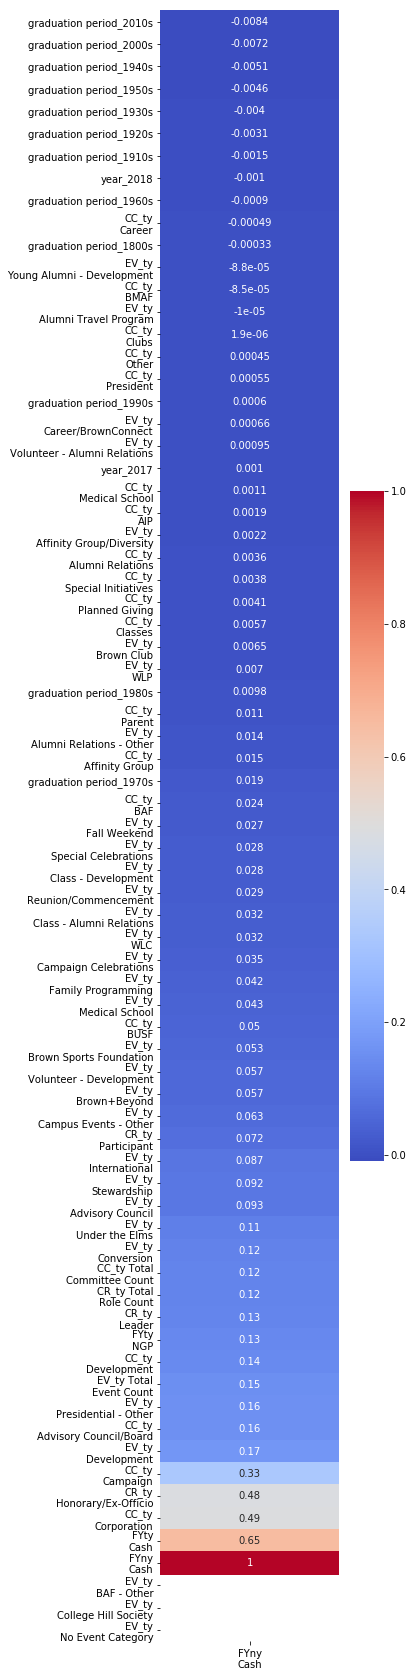

In [1674]:
plt.figure(figsize=(4,30))
sns.heatmap(df_new.corr()[['FYny\nCash']].sort_values('FYny\nCash'), annot=True, cmap='coolwarm')

## Linear Regression Model

In [1747]:
from sklearn.linear_model import LinearRegression,LassoCV, RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [1748]:
# I have applied tried-and-error method in order to decide on the number of variables.
# Train and test scores were compared at each trial.
# All features in the model were run, and number of predictors were decreased. 
# After visualizing the correlation level of the features, I chose the strongest 11 variables.
features=list(df_new.corr()[['FYny\nCash']].sort_values('FYny\nCash').index)[-15:-4]
X=df_new[features]
y=df_new['FYny\nCash']

In [1749]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(160977, 11)

In [1750]:
ss = StandardScaler()
ss.fit(X_train) # Learning mean and std for every column

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test) 

In [1751]:
# Train data score
linModel=LinearRegression()
linModel.fit(X_train_scaled,y_train)
linModel.score(X_train_scaled,y_train)

0.4954020126884934

In [1753]:
# Test data score
linModel.score(X_test_scaled,y_test)

0.49587612186289604

### Graph of Residuals and QQ Plot

In [1754]:
# Model predicts
linModel_Predicts=linModel.predict(X_test_scaled)

In [1755]:
# Residuals
residual=linModel_Predicts-y_test
r_table=pd.DataFrame(residual)
r_table.rename(columns={'Id':'residual'}, inplace=True)

In [1757]:
y_test_table=pd.DataFrame(y_test)
y_test_table.rename(columns={'Id':'y_test'}, inplace=True)

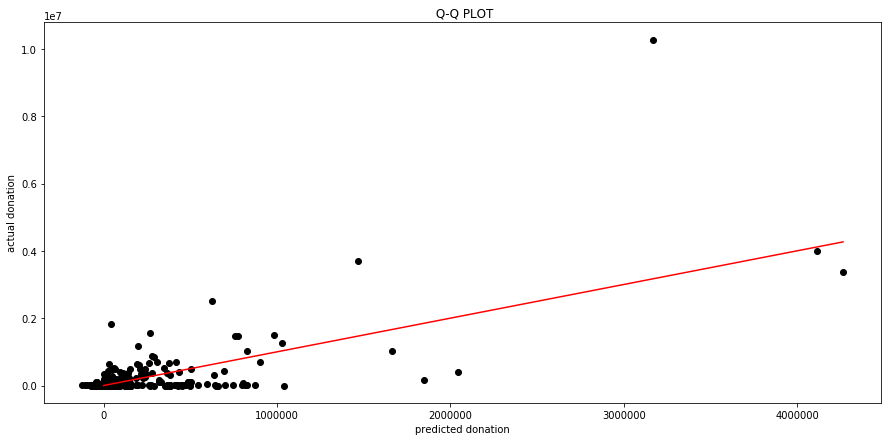

In [1758]:
plt.figure(figsize=(15,7))

plt.scatter(linModel.predict(X_test_scaled),y_test, c='k')
plt.xlabel('predicted donation')
plt.ylabel('actual donation')
plt.title(' Q-Q PLOT')

plt.plot( [0, np.max(linModel.predict(X_test_scaled))], [0, np.max(linModel.predict(X_test_scaled))], c = 'r')


Text(0, 0.5, 'residual')

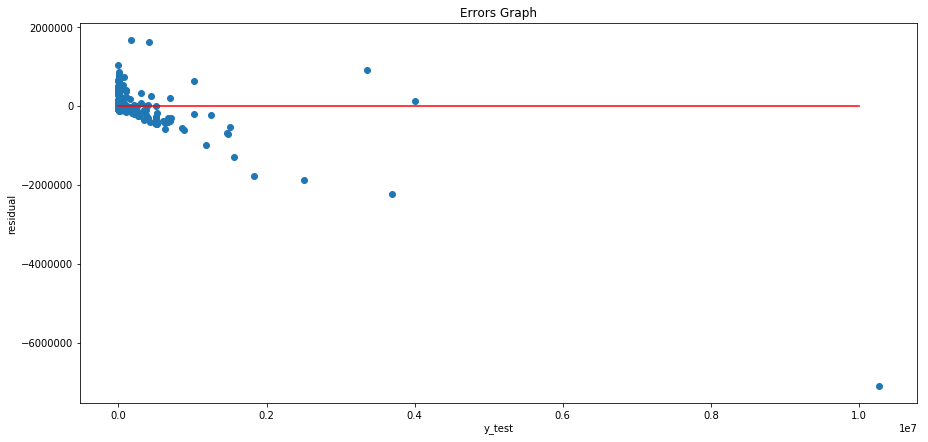

In [1759]:
plt.figure(figsize=(15,7))
plt.scatter(y_test_table['FYny\nCash'],r_table['FYny\nCash'])
plt.plot((0,10000000), (np.mean(r_table['FYny\nCash']),np.mean(r_table['FYny\nCash'])) , c='r')
plt.title('Errors Graph')
plt.xlabel('y_test')
plt.ylabel('residual')

#### DROP OUTLIERS

In [1760]:
df_new.shape

(214636, 73)

In [1761]:
# df_new=df_new.sort_values(['FYny\nCash'],ascending=False)[50:]
# I dropped the rows having more than 1M donation amount
df_new.drop(df_new.loc[df_new['FYny\nCash']>=1000000].index, inplace=True)
df_new.shape

(214558, 73)

In [1762]:
X=df_new[features]
y=df_new['FYny\nCash']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(160918, 11)

In [1763]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test) 

In [1764]:
linModel=LinearRegression()
linModel.fit(X_train_scaled,y_train)
linModel.score(X_train_scaled,y_train)

0.5269129511960857

In [1765]:
linModel.score(X_test_scaled,y_test)

0.09595307849229462

Text(0, 0.5, 'residual')

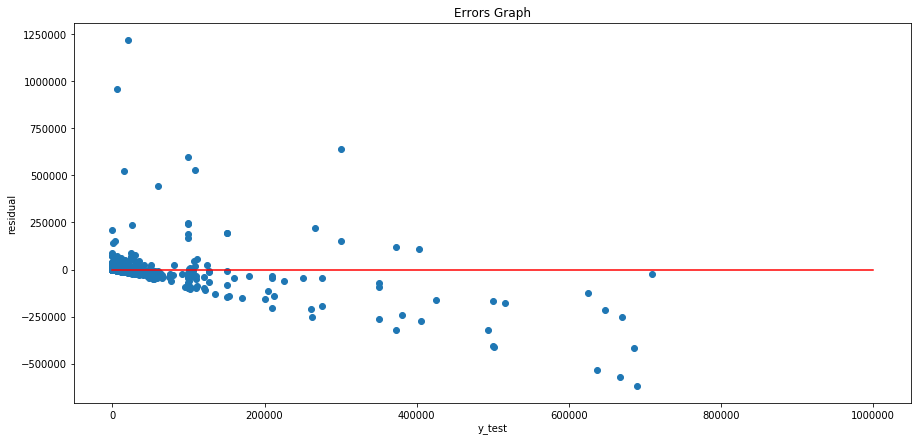

In [1766]:
linModel_Predicts=linModel.predict(X_test_scaled)
residual=linModel_Predicts-y_test
r_table=pd.DataFrame(residual)
r_table.rename(columns={'Id':'residual'}, inplace=True)
y_test_table=pd.DataFrame(y_test)
y_test_table.rename(columns={'Id':'y_test'}, inplace=True)

plt.figure(figsize=(15,7))
plt.scatter(y_test_table['FYny\nCash'],r_table['FYny\nCash'])
plt.plot((0,1000000), (np.mean(r_table['FYny\nCash']),np.mean(r_table['FYny\nCash'])) , c='r')
plt.title('Errors Graph')
plt.xlabel('y_test')
plt.ylabel('residual')

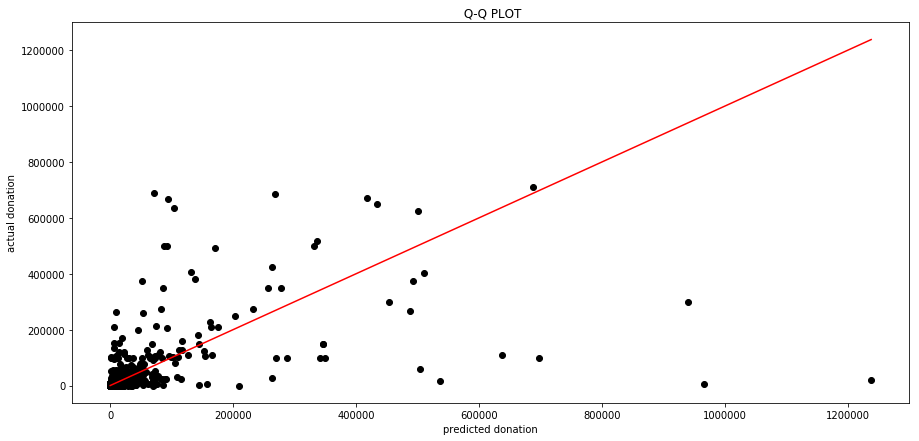

In [1767]:
plt.figure(figsize=(15,7))

plt.scatter(linModel.predict(X_test_scaled),y_test, c='k')
plt.xlabel('predicted donation')
plt.ylabel('actual donation')
plt.title(' Q-Q PLOT')

plt.plot( [0, np.max(linModel.predict(X_test_scaled))], [0, np.max(linModel.predict(X_test_scaled))], c = 'r')


### Drop donor who have not donated and donated over $1M

In [1768]:
df_new.drop(df_new.loc[df_new['FYny\nCash']==0].index, inplace=True)
df_new.drop(df_new.loc[df_new['FYny\nCash']>=1000000].index, inplace=True)
df_new.shape

(30524, 73)

In [1769]:
X=df_new[features]
y=df_new['FYny\nCash']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(22893, 11)

In [1770]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test) 

In [1771]:
linModel=LinearRegression()
linModel.fit(X_train_scaled,y_train)
linModel.score(X_train_scaled,y_train)

0.4355183987259032

In [1772]:
linModel.score(X_test_scaled,y_test)

0.4812669440900154

Text(0, 0.5, 'residual')

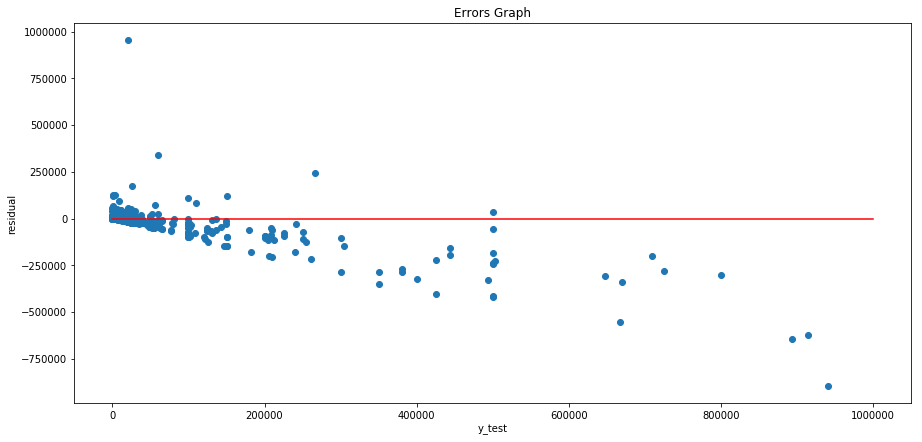

In [1773]:
linModel_Predicts=linModel.predict(X_test_scaled)
residual=linModel_Predicts-y_test
r_table=pd.DataFrame(residual)
r_table.rename(columns={'Id':'residual'}, inplace=True)
y_test_table=pd.DataFrame(y_test)
y_test_table.rename(columns={'Id':'y_test'}, inplace=True)

plt.figure(figsize=(15,7))
plt.scatter(y_test_table['FYny\nCash'],r_table['FYny\nCash'])
plt.plot((0,1000000), (np.mean(r_table['FYny\nCash']),np.mean(r_table['FYny\nCash'])) , c='r')
plt.title('Errors Graph')
plt.xlabel('y_test')
plt.ylabel('residual')

# **B2. can we identify major donors with donations above $50k?**

# **B2. can we identify major donors with donations above $50k?**

In [1774]:
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Split Main dataset based on donated years

In [1775]:
columns_2017=[]
columns_2018=[]
columns_2019=[]
for i in list(df.columns):
    if '17' in i:
        columns_2017.append(i)
    
for i in list(df.columns):
    if '18' in i:
        columns_2018.append(i)

for i in list(df.columns):
    if '19' in i:
        columns_2019.append(i)
columns_2017.append('UG\nClass')
columns_2018.append('UG\nClass')
columns_2019.append('UG\nClass')

df_2017=df[columns_2017]
df_2018=df[columns_2018]
df_2019=df[columns_2019]

In [1776]:
df_2017.columns = df_2017.columns.str.replace("(17)", "cy")
df_2018.columns = df_2017.columns.str.replace("(18)", "cy")
df_2019.columns = df_2017.columns.str.replace("(19)", "cy")

In [1777]:
df_2017['year']='2017'
df_2018['year']='2018'
df_2019['year']='2019'

### append three year datasets in one dataset

In [1778]:
df_class=pd.concat([df_2017,df_2018])
df_class=pd.concat([df_class,df_2018])
df_class.shape

(321954, 60)

In [1779]:
# I applied the year categorizion function to all dataset
df_class['graduation period']=df_class['UG\nClass'].apply(lambda x: period_maker(x))
df_class.drop(columns='UG\nClass',inplace=True)
df_class.shape

(321954, 60)

### Drop donor who have not donated and donated over $1M

In [1780]:
# Drop donor who have not donated and donated over $1M
df_class.drop(df_class.loc[df_class['FYcy\nCash']==0].index, inplace=True)
df_class.drop(df_class.loc[df_class['FYcy\nCash']>=1000000].index, inplace=True)
df_class.shape

(45924, 60)

### Convert to Binary Donated Amount is bigger than $50k

In [1781]:
# Created a function return 1 if amount of donation for each year is bigger than $50k
def major_donor(a):
    if a>50000:
        return 1
    else:
        return 0

In [1782]:
df_class['Major Donor']=df_class['FYcy\nCash'].map(lambda x: major_donor(x))
df_class.drop(columns='FYcy\nCash',inplace=True)
df_class['Promise Donor']=df_class['FYcy\nNGP'].map(lambda x: major_donor(x)) # for pledge amount I converted amount of above $50k to 1
# df_class['Promise Donor'] = df_class['Promise Donor'].astype(str)
df_class.drop(columns='FYcy\nNGP',inplace=True) # dropped pledge amount from dataset because I use binary format in model instead
df_class.head()

,CC_cy Total Committee Count,CC_cy Advisory Council/Board,CC_cy Affinity Group,CC_cy AIP,CC_cy Alumni Relations,CC_cy BAF,CC_cy BMAF,CC_cy BUSF,CC_cy Campaign,CC_cy Career,...,EV_cy WLP,EV_cy Young Alumni - Development,CR_cy Total Role Count,CR_cy Honorary/Ex-Officio,CR_cy Participant,CR_cy Leader,year,graduation period,Major Donor,Promise Donor
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2017,1990s,1,1
3,4,2,0,1,0,0,0,0,1,0,...,0,0,4,0,4,0,2017,1980s,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2017,2000s,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,2017,1980s,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2017,1990s,1,1


### Get Dummies

In [1783]:
# To able to use categorical variables We have to use dummy values of them
df_class=pd.get_dummies(df_class)
df_class.shape

(45924, 69)

#### HeatMap and Decide to choose which predictors should be used in Model

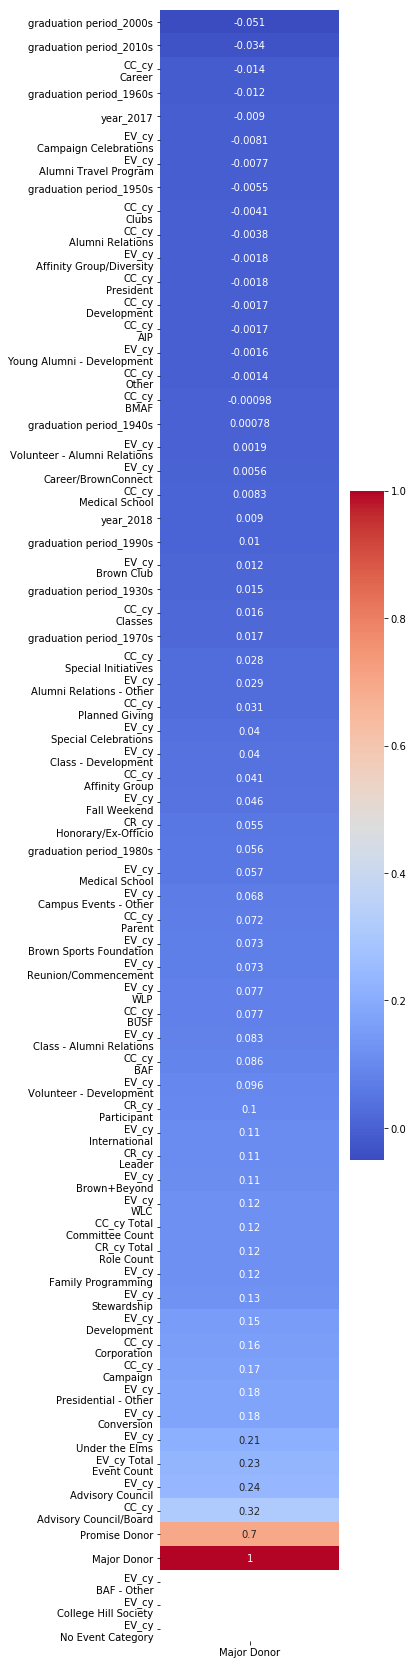

In [1784]:
plt.figure(figsize=(4,30))
sns.heatmap(df_class.corr()[['Major Donor']].sort_values('Major Donor'), annot=True, cmap='coolwarm')

In [1785]:
features=list(df_class.corr()[['Major Donor']].sort_values('Major Donor').index)[-10:-4] 
X=df_class[features]
y=df_class['Major Donor']

### Splitting Data

In [1787]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
X_train.shape

(34443, 6)

## Classification Models

In [1788]:
logreg_class=LogisticRegression()
knn_class=KNeighborsClassifier()
forest_class=RandomForestClassifier()
svc_class=svm.SVC()

In [1789]:
def process_model(model,X):
    ss=StandardScaler()
    X_sc=ss.fit_transform(X)
#     print(X_sc)
    model.fit(X_sc,y_train)
    crv=cross_val_score(model,X_sc,y_train).mean()
    return(crv)

#### PERFORMANCE OF MODELS

In [1790]:
# TRAINING DATA SCORES:
print('Train Data CV Score of the Models:')
pd.Series({'Log_Reg Class':process_model(logreg_class,X_train)
#            ,'KNN':process_model(knn_class,X_train),
#         'Random Forest Class':process_model(forest_class,X_train),
#            'SVC':process_model(svc_class,X_train)
          })
# I deactivated other 3 models because it takes to much process time. Except this, they resulted same accuracy as in Logistic Regression 

Train Data CV Score of the Models:


Log_Reg Class   1
dtype: float64

In [1791]:
ss=StandardScaler()
X_test_sc=ss.fit_transform(X_test)

In [1792]:
# TESTING DATA SCORES:
print('Test Data Score of the Models:')
pd.Series({'Log_Reg Class':logreg_class.score(X_test_sc,y_test)
#            ,'KNN':knn_class.score(X_test_sc,y_test),
#            'Random Forest Class':forest_class.score(X_test_sc,y_test),
#            'SVC':svc_class.score(X_test_sc,y_test) 
          })

Test Data Score of the Models:


Log_Reg Class   1
dtype: float64

### Coefficient Table of Predictors

In [1793]:
# Predictor Coefficients in Model
coefficient_table=pd.DataFrame(logreg_class.coef_,columns=features).T
coefficient_table.columns=['value']
coefficient_table

,value
EV_cy\nConversion,0
EV_cy\nUnder the Elms,0
EV_cy Total\nEvent Count,0
EV_cy\nAdvisory Council,0
CC_cy\nAdvisory Council/Board,0
Promise Donor,1


In [1794]:
# I displayed coefficients in decimal 
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(pd.DataFrame(coefficient_table))

                               value
EV_cy\nConversion               0.08
EV_cy\nUnder the Elms           0.15
EV_cy Total\nEvent Count        0.12
EV_cy\nAdvisory Council         0.02
CC_cy\nAdvisory Council/Board   0.30
Promise Donor                   0.72


# B3. how could Advancement measure alumni engagement?

Regarding the coefficient of the Classification Model, the most important first three predictors are Promise Donor(Pledge), CC_Advisory Council/Board, EV_Under the Elms. For exmample Advancement should encourage the donors for as much as high pledge amount because Pledge is the most effective driven feature for major donors. In addition, students should be advised/encouraged to attend/participate in EV_Under the Elms and CC_Advisory Council/Board.

# B4. what events and committees drive donations?

Based on HeatMap at Classification Section, We can check the correlation of the all variables with Donation. By assumption of the any certain level of correlation we can say which feature drives the donation. Here I assume that the features having over 0.1 value of correlation has significant effect on donation amount. Therefore, the following event and committees drive donations:

 'CR Participant',
 'EV International',
 'CR Leader',
 'EV Brown+Beyond',
 'EV WLC',
 'CC Total Committee Count',
 'CR Total Role Count',
 'EV Family Programming',
 'EV Stewardship',
 'EV Development',
 'CC Corporation',
 'CC Campaign',
 'EV Presidential - Other',
 'EV Conversion'
 'EV Under the Elms',
 'EV Total Event Count',
 'EV Advisory Council',
 'CC Advisory Council/Board',
 'Promise Donor'

# B.5 what events and committees don't drive donations?

In the same manner with above assumption, the features having less than 0.1 value of correlation don't drive donations. thus, the following event and committees don't drive donations:


 'CC Career',
 'EV Campaign Celebrations',
 'EV Alumni Travel Program',
 'CC Clubs',
 'CC Alumni Relations',
 'EV Affinity Group/Diversity',
 'CC President',
 'CC Development',
 'CC AIP',
 'EV Young Alumni - Development',
 'CC Other',
 'CC BMAF',
 'EV Volunteer - Alumni Relations',
 'EV Career/BrownConnect',
 'CC Medical School',
 'EV Brown Club',
 'CC Classes',
 'CC Special Initiatives',
 'EV Alumni Relations - Other',
 'CC Planned Giving',
 'EV Special Celebrations',
 'EV Class - Development',
 'CC Affinity Group',
 'EV Fall Weekend',
 'CR Honorary/Ex-Officio',
 'EV Medical School',
 'EV Campus Events - Other',
 'CC Parent',
 'EV Brown Sports Foundation',
 'EV Reunion/Commencement',
 'EV WLP',
 'CC BUSF',
 'EV Class - Alumni Relations',
 'CC BAF',
 'EV Volunteer - Development',